In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [4]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60/60 [==============================] - 0s 3ms/step - loss: 1.9772 - accuracy: 0.3559
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.2053 - accuracy: 0.6674
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.0183 - accuracy: 0.7198
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.9185 - accuracy: 0.7413
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8484 - accuracy: 0.7578
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8084 - accuracy: 0.7640
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7651 - accuracy: 0.7738
Epoch 8/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7383 - accuracy: 0.7800
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.7916
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.7892


In [6]:
model.evaluate(X_test.reshape(-1, 784), y_test)

313/313 [==============================] - 0s 512us/step - loss: 0.6986 - accuracy: 0.7832


[0.6986414790153503, 0.7832000255584717]

In [7]:
model.predict(X_test.reshape(-1, 784))

array([[0.145452  , 0.10288009, 0.35553044, ..., 0.8906603 , 0.60400575,
        0.961001  ],
       [0.55156475, 0.12412181, 0.9630912 , ..., 0.09057379, 0.52292484,
        0.11249825],
       [0.54633516, 0.9878665 , 0.19932511, ..., 0.11398223, 0.06697291,
        0.11878973],
       ...,
       [0.7137779 , 0.18722022, 0.19923541, ..., 0.2667327 , 0.8838309 ,
        0.31649908],
       [0.42377758, 0.9766549 , 0.18191856, ..., 0.19732085, 0.07985431,
        0.20273808],
       [0.1485736 , 0.11378554, 0.43420157, ..., 0.97373414, 0.77233225,
        0.71043974]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


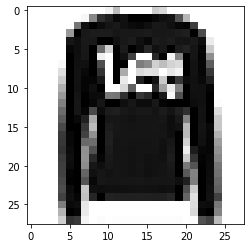

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1], cmap="gray_r")
plt.show()

In [8]:
pred = model.predict(X_test.reshape(-1, 784))

In [9]:
import numpy as np

np.argmax(pred[1])

2

In [18]:
np.argmax(pred, axis=1).size

10000

In [17]:
np.argmax(pred, axis=1)

array([9, 2, 1, ..., 8, 1, 7])

In [11]:
import pandas as pd

ytrue = pd.Series(np.argmax(y_test, axis = 1), name = 'actual')
ypred = pd.Series(np.argmax(pred, axis = 1), name = 'pred')

pd.crosstab(ytrue, ypred)

pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,762,7,22,90,16,2,76,0,24,1
1,10,914,14,46,8,0,6,0,2,0
2,12,0,661,12,192,1,106,0,16,0
3,40,13,9,821,63,1,47,0,6,0
4,0,6,158,44,681,1,100,0,10,0
5,0,0,1,4,0,810,1,90,13,81
6,196,4,155,58,116,0,438,0,33,0
7,0,0,0,0,0,45,0,874,0,81
8,4,1,16,10,5,5,12,8,938,1


In [19]:
print(ytrue)

0       9
1       2
2       1
3       1
4       6
       ..
9995    9
9996    1
9997    8
9998    1
9999    5
Name: actual, Length: 10000, dtype: int64


In [20]:
print(ypred)

0       9
1       2
2       1
3       1
4       6
       ..
9995    9
9996    1
9997    8
9998    1
9999    7
Name: pred, Length: 10000, dtype: int64
